In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation


In [2]:
def compute_error(w: float,
                  b: float,
                  x: npt.NDArray[np.float64],
                  y: npt.NDArray[np.float64]) -> float:
    '''
    Compute the mean squared error of the linear model.
    '''
    error = 0
    for i in range(len(x)):
        # f = (wx + b - y) ^ 2
        error += (w * x[i] + b - y[i]) ** 2
    return error


def step_gradient(w: float,
                  b: float,
                  x: npt.NDArray[np.float64],
                  y: npt.NDArray[np.float64],
                  lr: float) -> Tuple[float, float]:
    '''
    Compute the gradient of the linear model.
    '''
    w_grad = 0
    b_grad = 0
    for i in range(len(x)):
        # ∂f/∂w = 2 * (wx + b - y) * x
        # ∂f/∂b = 2 * (wx + b - y)
        w_grad += 2 * (w * x[i] + b - y[i]) * x[i]
        b_grad += 2 * (w * x[i] + b - y[i])
    w -= lr * w_grad
    b -= lr * b_grad
    return w, b


In [3]:
# Load the selected features
features = np.loadtxt('dataset/20151026_113_selected')
# features.shape = (15,6)
w = np.zeros(features.shape[1])
# w.shape = (6,)
b = np.zeros(features.shape[1])
# b.shape = (6,)
x = np.array(range(1, features.shape[0] + 1))
# x.shape = (15,)
error = np.zeros(features.shape[1])
# error.shape = (6,)

# Hyperparameters
lr = 1e-4
epochs = 10

# Initialize the arrays to store the errors and parameters
errors = np.zeros((epochs, features.shape[1]))
params = np.zeros((epochs, 2, features.shape[1]))

# Train the model
for iter in range(epochs):
    for idx in range(features.shape[1]):

        # Update the parameters
        w[idx], b[idx] = step_gradient(w[idx], b[idx], x, features[:, idx], lr)

        # Compute the error
        error[idx] = compute_error(w[idx], b[idx], x, features[:, idx])

    # Store the parameters for animation
    params[iter] = w, b
    errors[iter] = error

    print(f'epoch: {iter}, error: {int(error[0])}, '
          f'w: {int(w[0])}, b: {int(b[0])}')
    

epoch: 0, error: 21263901293, w: 763, b: 88
epoch: 1, error: 18359849836, w: 1335, b: 158
epoch: 2, error: 16726860373, w: 1763, b: 214
epoch: 3, error: 15808217573, w: 2084, b: 259
epoch: 4, error: 15291043638, w: 2324, b: 297
epoch: 5, error: 14999499125, w: 2504, b: 329
epoch: 6, error: 14834761071, w: 2638, b: 356
epoch: 7, error: 14741290297, w: 2738, b: 380
epoch: 8, error: 14687873410, w: 2813, b: 402
epoch: 9, error: 14656968266, w: 2869, b: 421


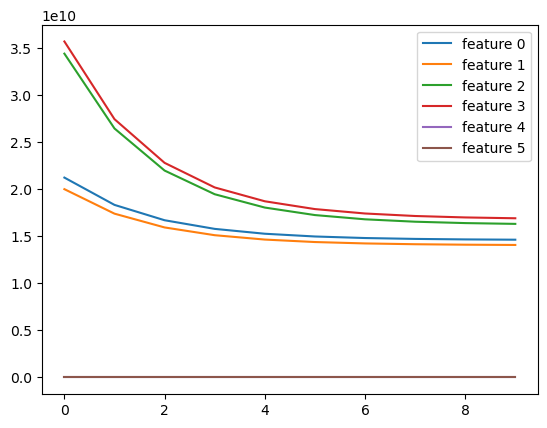

In [4]:
# Plot the errors
plt.plot(errors)
plt.legend([f'feature {i}' for i in range(features.shape[1])])
plt.show()


In [5]:
plt.ioff()

# Plot the linear models
fig, axs = plt.subplots(2, 3)


def update(t: int):
    '''
    Plot with the parameters at epoch t.
    '''
    w, b = params[t]
    for i in range(6):
        axs[i // 3, i % 3].cla()
        axs[i // 3, i % 3].plot(x, features[:, i], '.')
        axs[i // 3, i % 3].plot(x, w[i] * x + b[i])


# Animate the plots
animation = FuncAnimation(fig, update, frames=epochs, interval=100)

# Display the animation in the jupyter notebook
HTML(animation.to_jshtml())
